# Implementation of K-means clustering using Mall customers dataset

Steps:
- Importing modules and libraries
- Data injestion
- Basic operations
- EDA
- Checking model, inertia, silhouette score in multiple k value
- Plotting Elbow
- Finding optimized K value

In [30]:
# Importing required modules

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import warnings
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv')

In [32]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
df = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [34]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [35]:
# Checking data Types 

df.dtypes

Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [36]:
# Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [37]:
# Shape of the data

df.shape

(200, 2)

In [38]:
# Number of unique values in each column

df.nunique()

Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

### Checking null value in each columns

In [39]:
df.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Checking duplicate records

In [40]:
df.duplicated().sum()

4

### Distribution of the data

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


### Histogram

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

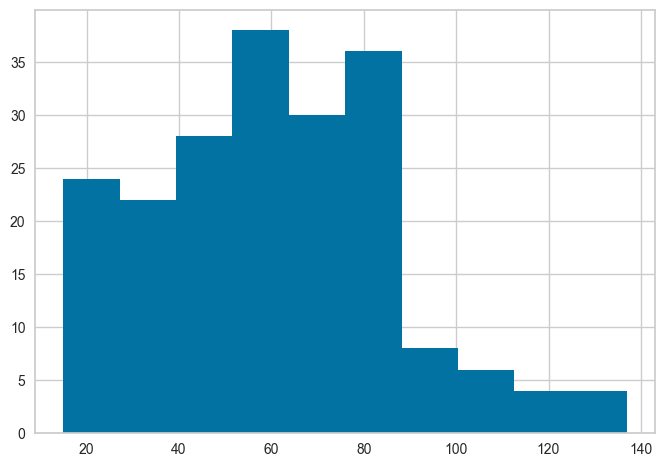

In [42]:
plt.hist(data=df, x='Annual Income (k$)')

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

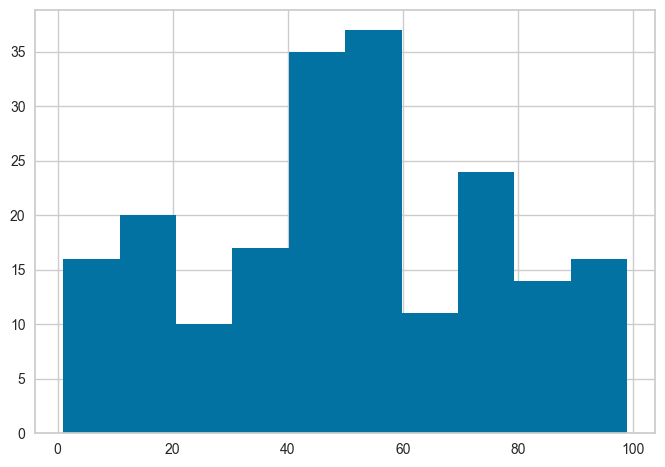

In [43]:
plt.hist(data=df, x='Spending Score (1-100)')

### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x16f9954ebd0>,
 'caps': [<matplotlib.lines.Line2D at 0x16f99554490>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f9953ebd0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f99555850>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f9954fe50>],
 'means': []}

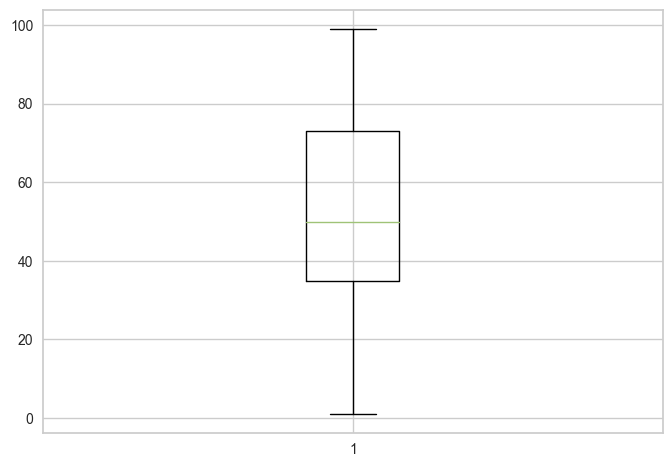

In [44]:
plt.boxplot(data=df, x='Spending Score (1-100)')

{'whiskers': [<matplotlib.lines.Line2D at 0x16f9957d690>,
 'caps': [<matplotlib.lines.Line2D at 0x16f995b7a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f995b5990>],
 'medians': [<matplotlib.lines.Line2D at 0x16f995c4f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f995b6d90>],
 'means': []}

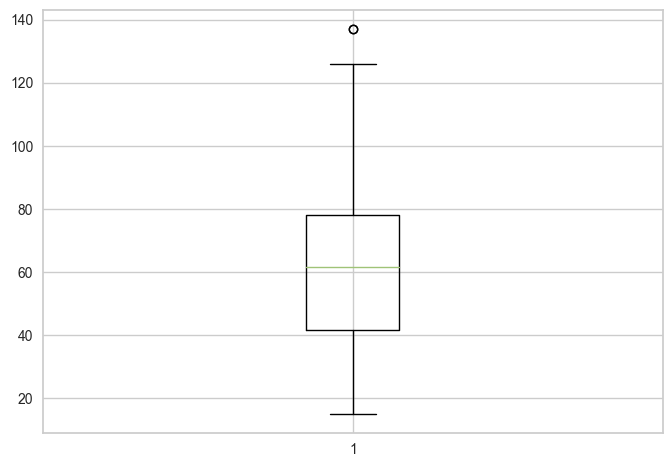

In [45]:
plt.boxplot(data=df, x='Annual Income (k$)')

#### Observation :
- There is an outlier in the higher side of the distribution.

### lmplot
Displays multiple relationship in dataset

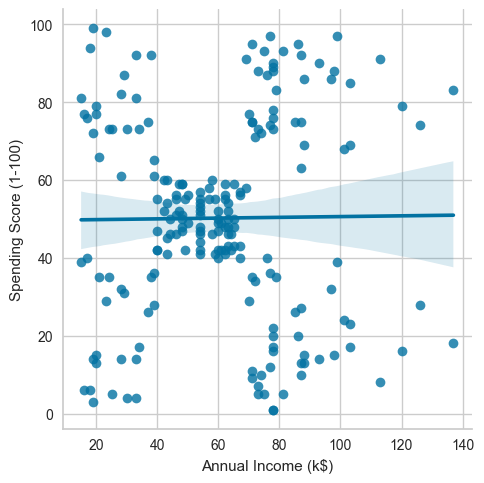

In [46]:
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

In [47]:
X = np.array(df)

In [48]:
for i in range(2,9):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=25, verbose=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    print(f'Prediction of model with k={i} :',kmeans.predict([[10, 32], [17, 42]]))
    print(f'Center of the cluster with k ={i} :',kmeans.cluster_centers_)
    print(f'Inertia of model with k={i} : ',kmeans.inertia_)
    print(f'Silhouette Score of model with k={i} : ',silhouette_score(df, labels))
    print()

Prediction of model with k=2 : [0 0]
Center of the cluster with k =2 : [[37.28888889 50.28888889]
 [79.6        50.12727273]]
Inertia of model with k=2 :  181363.59595959593
Silhouette Score of model with k=2 :  0.2968969162503008

Prediction of model with k=3 : [0 0]
Center of the cluster with k =3 : [[44.15447154 49.82926829]
 [87.         18.63157895]
 [86.53846154 82.12820513]]
Inertia of model with k=3 :  106348.37306211118
Silhouette Score of model with k=3 :  0.46761358158775435

Prediction of model with k=4 : [2 2]
Center of the cluster with k =4 : [[87.         18.63157895]
 [48.26       56.48      ]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]]
Inertia of model with k=4 :  73679.78903948836
Silhouette Score of model with k=4 :  0.4931963109249047

Prediction of model with k=5 : [2 2]
Center of the cluster with k =5 : [[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]]
Inertia of model

#### Observation :
- With k=, model has highest silhouette score of 55.3%

In [49]:
# Function to plot Elbow

def plot_elbow(model , data , metric='silhouette') : 
    
    k_elbow = KElbowVisualizer(model, k=(2,10) , metric=metric)
    k_elbow.fit(data).show()

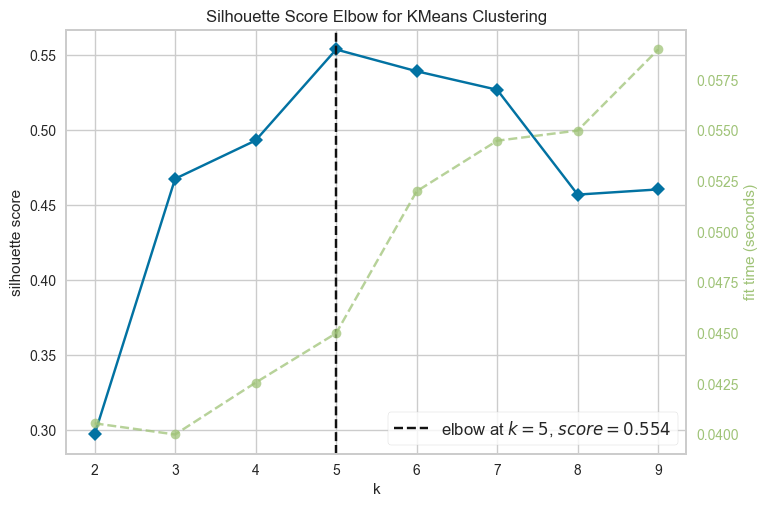

In [50]:
plot_elbow(KMeans() , X)

#### Observation :
- The optimized k value is 5

### Plotting K-means

In [51]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

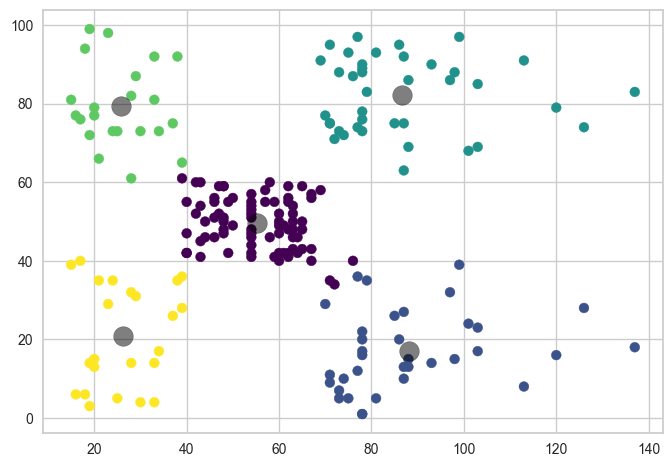

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)